# Project Name: Predicting Customer Purchase Behavior

Understanding and predicting customer purchase behaviour is crucial for businesses aiming to optimize their marketing strategies, improve customer retention, and increase sales. By analysing customer demographics, purchase history, and engagement with the website, it is possible to develop a predictive model that estimates the likelihood of a customer making a
purchase.

## Objective
The objective of this project is to develop a machine learning model that can predict whether a customer will make a purchase based on various demographic and behavioural features. The model will be trained on historical customer data and will aim to provide accurate predictions to support business decision-making processes.

## Problem Statement

Given a dataset containing customer information, including the following variables, develop a predictive model to estimate the likelihood of a customer making a purchase:

• Age: Customer's age

• Gender: Customer's gender (0: Male, 1: Female)

• Annual Income: Annual income of the customer in dollars

• Number of Purchases: Total number of purchases made by the customer

• Product Category: Category of the purchased product (0: Electronics, 1: Clothing, 2:Home Goods, 3: Beauty, 4: Sports)

• Time Spent on Website: Time spent by the customer on the website in minutes

• Loyalty Program: Whether the customer is a member of the loyalty program (0: No, 1:Yes)

• Discounts Availed: Number of discounts availed by the customer (range: 0-5)

• Purchase Status: Likelihood of the customer making a purchase (0: No, 1: Yes)

# Importing Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pylab as plt
%matplotlib inline
import seaborn as sns
plt.rcParams['figure.figsize']=(10,6)
palette = sns.color_palette("viridis", 10)
import datetime
import ydata_profiling
from ydata_profiling import ProfileReport
import sweetviz as sv
import pycaret
from pycaret.classification import *

# Reading Data

In [2]:
data=pd.read_csv('customer_purchase_data.csv', encoding='latin-1')
data.head()

,Age,Gender,AnnualIncome,NumberOfPurchases,ProductCategory,TimeSpentOnWebsite,LoyaltyProgram,DiscountsAvailed,PurchaseStatus
0,40,1,66120.267939,8,0,30.568601,0,5,1
1,20,1,23579.773583,4,2,38.240097,0,5,0
2,27,1,127821.306432,11,2,31.633212,1,0,1
3,24,1,137798.623120,19,3,46.167059,0,4,1
4,31,1,99300.964220,19,1,19.823592,0,0,1


In [3]:
print('Shape of Data:',data.shape)

Shape of Data: (1500, 9)


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1500 entries, 0 to 1499
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Age                 1500 non-null   int64  
 1   Gender              1500 non-null   int64  
 2   AnnualIncome        1500 non-null   float64
 3   NumberOfPurchases   1500 non-null   int64  
 4   ProductCategory     1500 non-null   int64  
 5   TimeSpentOnWebsite  1500 non-null   float64
 6   LoyaltyProgram      1500 non-null   int64  
 7   DiscountsAvailed    1500 non-null   int64  
 8   PurchaseStatus      1500 non-null   int64  
dtypes: float64(2), int64(7)
memory usage: 105.6 KB


In [5]:
df=data.copy() # To avoid data loss

In [6]:
df.isna().any()

Age                   False
Gender                False
AnnualIncome          False
NumberOfPurchases     False
ProductCategory       False
TimeSpentOnWebsite    False
LoyaltyProgram        False
DiscountsAvailed      False
PurchaseStatus        False
dtype: bool

In [7]:
df.duplicated().any()

True

In [8]:
df.drop_duplicates(inplace=True)

In [9]:
print('Shape of data after Preprocessed:',df.shape)

Shape of data after Preprocessed: (1388, 9)


In [10]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,1388.0,43.939481,15.487533,18.000000,30.750000,44.000000,57.000000,70.000000
Gender,1388.0,0.501441,0.500178,0.000000,0.000000,1.000000,1.000000,1.000000
AnnualIncome,1388.0,84699.045444,37541.136478,20001.512518,53766.895806,84625.292873,117188.207975,149785.176481
NumberOfPurchases,1388.0,10.548991,5.869383,0.000000,6.000000,11.000000,15.000000,20.000000
ProductCategory,1388.0,2.002882,1.422851,0.000000,1.000000,2.000000,3.000000,4.000000
TimeSpentOnWebsite,1388.0,30.747545,16.976852,1.037023,16.379635,31.213146,44.666368,59.991105
LoyaltyProgram,1388.0,0.333573,0.471659,0.000000,0.000000,0.000000,1.000000,1.000000
DiscountsAvailed,1388.0,2.609510,1.699984,0.000000,1.000000,3.000000,4.000000,5.000000
PurchaseStatus,1388.0,0.466859,0.499080,0.000000,0.000000,0.000000,1.000000,1.000000


# Exploratory Data Analysis

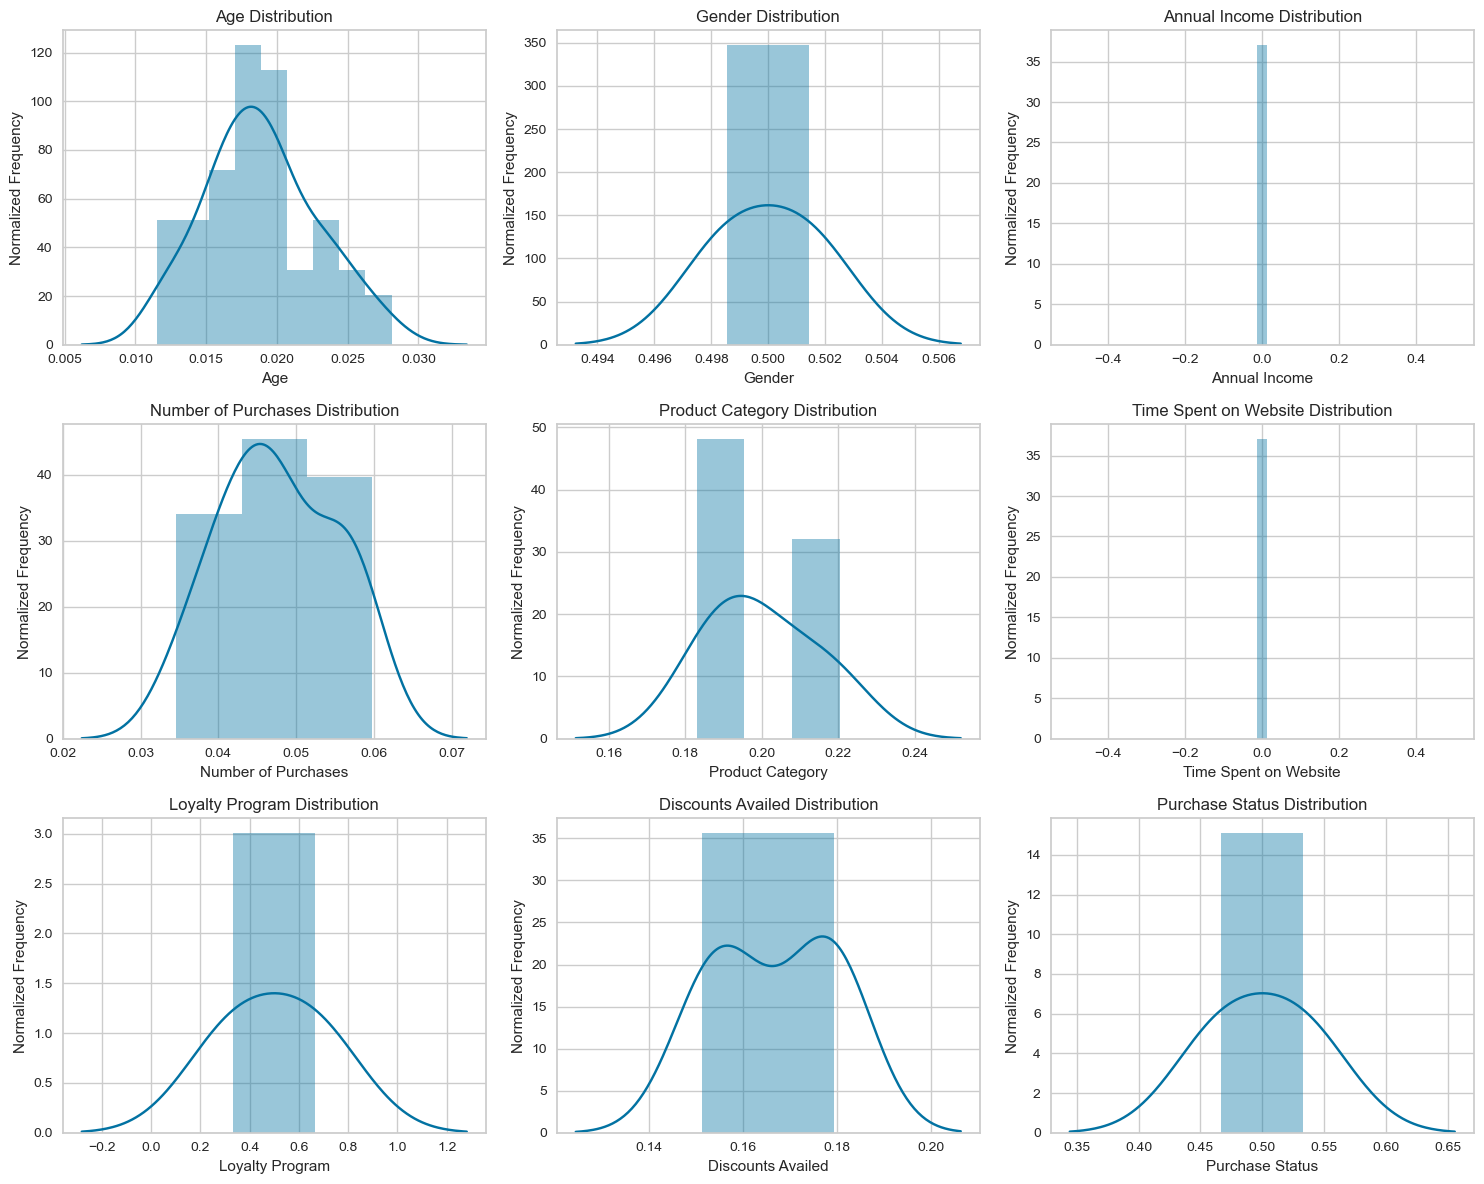

In [11]:

# Create a 3x3 grid of subplots
fig, axes = plt.subplots(3, 3, figsize=(15, 12))

# Plot Age distribution
sns.distplot(df['Age'].value_counts(normalize=True).sort_index(), ax=axes[0, 0])
axes[0, 0].set(xlabel='Age', ylabel='Normalized Frequency', title='Age Distribution')

# Plot Gender distribution
sns.distplot(df['Gender'].value_counts(normalize=True).sort_index(), ax=axes[0, 1])
axes[0, 1].set(xlabel='Gender', ylabel='Normalized Frequency', title='Gender Distribution')

# Plot Annual Income distribution
sns.distplot(df['AnnualIncome'].value_counts(normalize=True).sort_index(), ax=axes[0, 2])
axes[0, 2].set(xlabel='Annual Income', ylabel='Normalized Frequency', title='Annual Income Distribution')

# Plot Number of Purchases distribution
sns.distplot(df['NumberOfPurchases'].value_counts(normalize=True).sort_index(), ax=axes[1, 0])
axes[1, 0].set(xlabel='Number of Purchases', ylabel='Normalized Frequency', title='Number of Purchases Distribution')

# Plot Product Category distribution
sns.distplot(df['ProductCategory'].value_counts(normalize=True).sort_index(), ax=axes[1, 1])
axes[1, 1].set(xlabel='Product Category', ylabel='Normalized Frequency', title='Product Category Distribution')

# Plot Time Spent on Website distribution
sns.distplot(df['TimeSpentOnWebsite'].value_counts(normalize=True).sort_index(), ax=axes[1, 2])
axes[1, 2].set(xlabel='Time Spent on Website', ylabel='Normalized Frequency', title='Time Spent on Website Distribution')

# Plot Loyalty Program distribution
sns.distplot(df['LoyaltyProgram'].value_counts(normalize=True).sort_index(), ax=axes[2, 0])
axes[2, 0].set(xlabel='Loyalty Program', ylabel='Normalized Frequency', title='Loyalty Program Distribution')

# Plot Discounts Availed distribution
sns.distplot(df['DiscountsAvailed'].value_counts(normalize=True).sort_index(), ax=axes[2, 1])
axes[2, 1].set(xlabel='Discounts Availed', ylabel='Normalized Frequency', title='Discounts Availed Distribution')

# Plot Purchase Status distribution
sns.distplot(df['PurchaseStatus'].value_counts(normalize=True).sort_index(), ax=axes[2, 2])
axes[2, 2].set(xlabel='Purchase Status', ylabel='Normalized Frequency', title='Purchase Status Distribution')

# Adjust spacing between subplots
plt.tight_layout()

# Show the plots
plt.show()


### All of the product categories are nearly equally distirbuted across the dataset


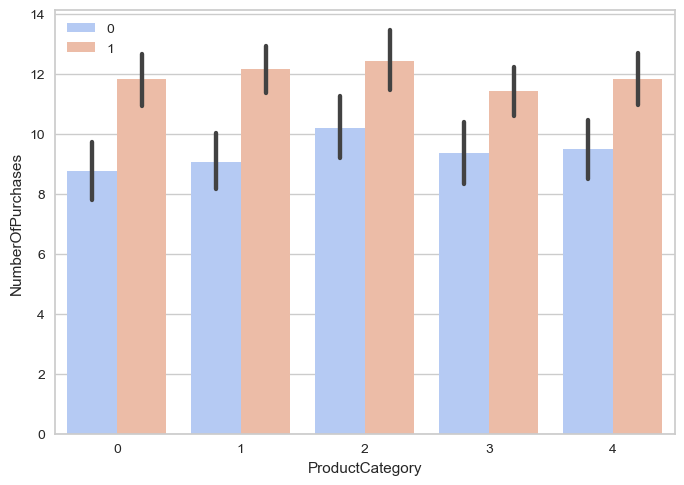

In [12]:
sns.barplot(df[['ProductCategory','NumberOfPurchases','PurchaseStatus']],
            hue='PurchaseStatus',x='ProductCategory',y='NumberOfPurchases',
           palette='coolwarm')
plt.legend(loc='upper left')
plt.show()

## Blue Bars (0): Represent customers who did not make a purchase.

## Orange Bars (1): Represent customers who made a purchase.

### Electronics (0): More purchases were made compared to non-purchases.

### Clothing (1): Similar trend, with purchases outnumbering non-purchases.

### Home Goods (2): Again, more purchases than non-purchases.

### Beauty (3): Follows the same pattern, with purchases being higher.

### Sports (4): Purchases are higher than non-purchases.


#### Across all product categories, the likelihood of making a purchase (orange bars) is higher than not making a purchase (blue bars).

#### This suggests that customers are generally more inclined to make purchases regardless of the product category.

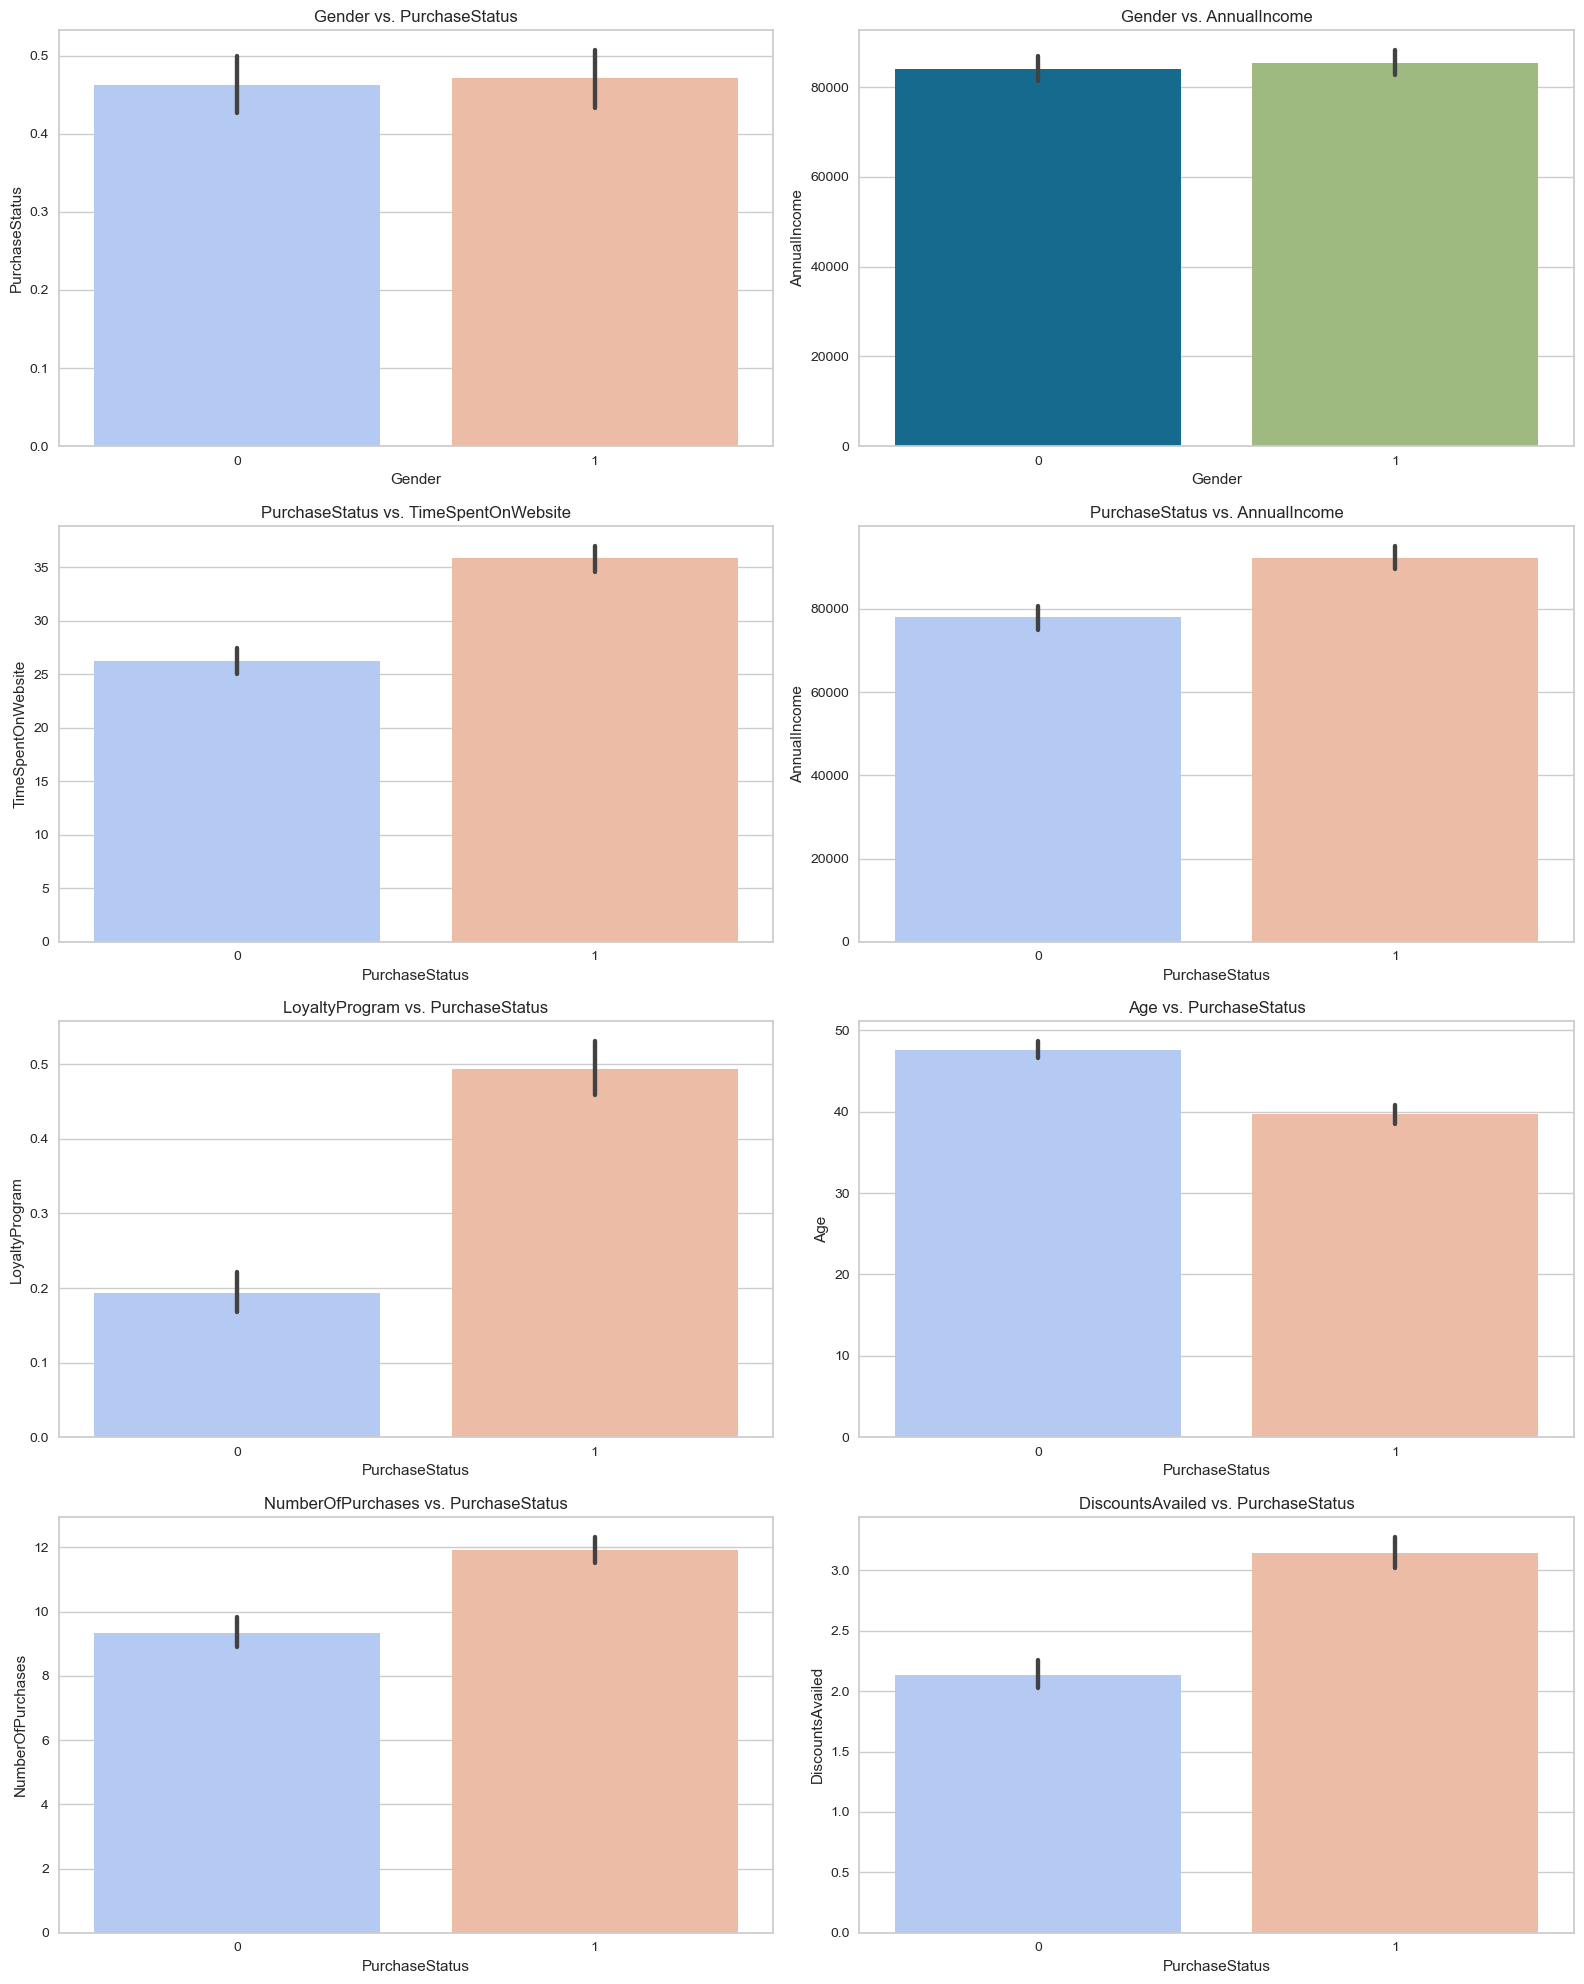

In [13]:

# Create subplots
fig, axes = plt.subplots(4, 2, figsize=(16, 20))

# Gender vs. PurchaseStatus
sns.barplot(data=df, x='Gender', y='PurchaseStatus', palette='coolwarm', ax=axes[0, 0])
axes[0, 0].set_title('Gender vs. PurchaseStatus')

# Gender vs. AnnualIncome
sns.barplot(data=df, x='Gender', y='AnnualIncome', ax=axes[0, 1])
axes[0, 1].set_title('Gender vs. AnnualIncome')

# PurchaseStatus vs. TimeSpentOnWebsite
sns.barplot(data=df, x='PurchaseStatus', y='TimeSpentOnWebsite', palette='coolwarm', ax=axes[1, 0])
axes[1, 0].set_title('PurchaseStatus vs. TimeSpentOnWebsite')

# PurchaseStatus vs. AnnualIncome
sns.barplot(data=df, x='PurchaseStatus', y='AnnualIncome', palette='coolwarm', ax=axes[1, 1])
axes[1, 1].set_title('PurchaseStatus vs. AnnualIncome')

# LoyaltyProgram vs. PurchaseStatus
sns.barplot(data=df, x='PurchaseStatus', y='LoyaltyProgram', palette='coolwarm', ax=axes[2, 0])
axes[2, 0].set_title('LoyaltyProgram vs. PurchaseStatus')

# Age vs. PurchaseStatus
sns.barplot(data=df, x='PurchaseStatus', y='Age', palette='coolwarm', ax=axes[2, 1])
axes[2, 1].set_title('Age vs. PurchaseStatus')

# NumberOfPurchases vs. PurchaseStatus
sns.barplot(data=df, x='PurchaseStatus', y='NumberOfPurchases', palette='coolwarm', ax=axes[3, 0])
axes[3, 0].set_title('NumberOfPurchases vs. PurchaseStatus')

# DiscountsAvailed vs. PurchaseStatus
sns.barplot(data=df, x='PurchaseStatus', y='DiscountsAvailed', palette='coolwarm', ax=axes[3, 1])
axes[3, 1].set_title('DiscountsAvailed vs. PurchaseStatus')

plt.tight_layout()
plt.show()


### Gender vs. Purchase Status and Annual Income

#### Gender pays no contribution on number of Purchases or their Annual Income

### Annual Income vs. Purchase Status

#### Higher income correlates with a higher likelihood of making a purchase.

### Number of Purchases vs. Purchase Status

#### This plot shows the relationship between the number of purchases and the likelihood of making a purchase. It can indicate if frequent buyers are more likely to make purchases.

### Time Spent on Website vs. Purchase Status

#### Spending more time on the website increases the chances of making a purchase.

### Loyalty Program vs. Purchase Status

#### Loyalty program members are more likely to make purchases.

### Discounts Availed vs. Purchase Status

#### Customers who avail more discounts are more likely to make purchases.

### Age vs. Purchase Status

#### Lower age groups are more likely to make purchases than higher age groups.

In [14]:
corr_matrix = df.corr()
corr_matrix

,Age,Gender,AnnualIncome,NumberOfPurchases,ProductCategory,TimeSpentOnWebsite,LoyaltyProgram,DiscountsAvailed,PurchaseStatus
Age,1.000000,0.018998,0.012101,-0.046969,-0.014159,0.019733,-0.001972,0.019256,-0.253598
Gender,0.018998,1.000000,0.017676,0.001941,-0.023306,0.006987,0.039219,-0.046821,0.008856
AnnualIncome,0.012101,0.017676,1.000000,0.003408,0.025698,-0.003997,-0.037318,0.022385,0.191218
NumberOfPurchases,-0.046969,0.001941,0.003408,1.000000,0.017422,0.030379,0.052561,0.026414,0.219116
ProductCategory,-0.014159,-0.023306,0.025698,0.017422,1.000000,-0.006181,0.032945,0.022225,0.014349
TimeSpentOnWebsite,0.019733,0.006987,-0.003997,0.030379,-0.006181,1.000000,0.000948,0.005879,0.282127
LoyaltyProgram,-0.001972,0.039219,-0.037318,0.052561,0.032945,0.000948,1.000000,-0.049638,0.318059
DiscountsAvailed,0.019256,-0.046821,0.022385,0.026414,0.022225,0.005879,-0.049638,1.000000,0.296606
PurchaseStatus,-0.253598,0.008856,0.191218,0.219116,0.014349,0.282127,0.318059,0.296606,1.000000


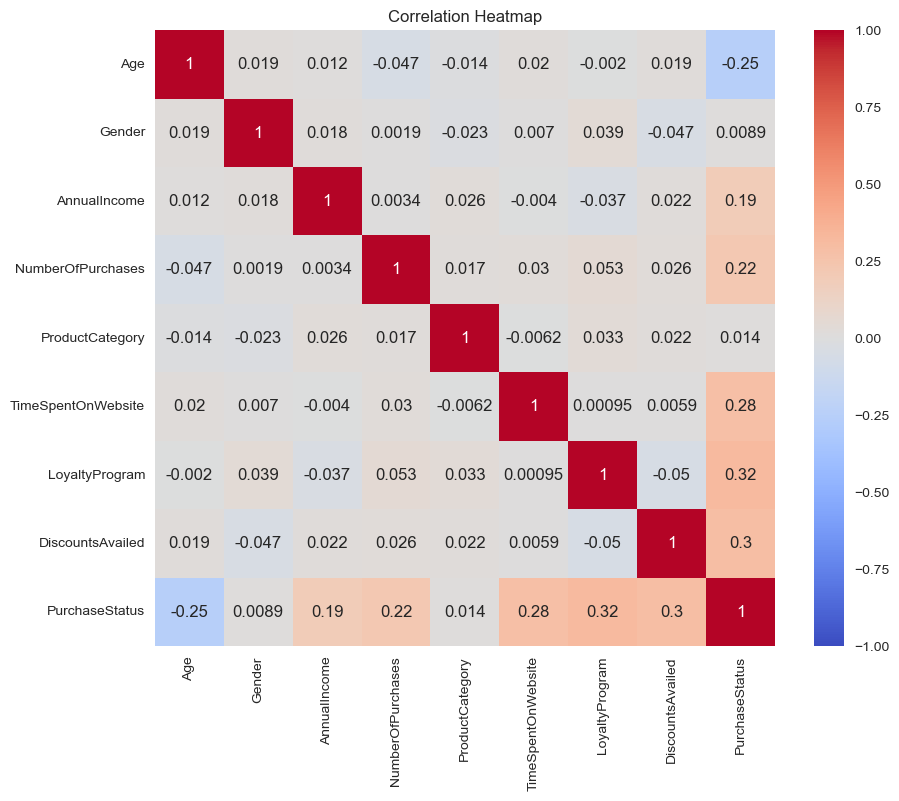

In [15]:
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Heatmap')
plt.show()

**Age and Annual Income:**

***As age increases, annual income tends to increase slightly.***

**Annual Income and Number of Purchases:**

***Customers with higher annual income may make slightly more purchases.***

**Number of Purchases and Product Category:**

***No strong correlation is visible between the number of purchases and product category.***

**Time Spent on Website and Loyalty Program**

***There is a positive correlation between time spent on the website and loyalty program membership.***

***Customers who spend more time on the website are more likely to be part of the loyalty program.***

**Discounts Availed and Purchase Status:**

***No significant correlation is observed between discounts availed and purchase status.***

**Purchase Status and Other Variables:**

***The strongest correlation is between purchase status and loyalty program membership.***

***Other variables show weaker correlations.***

# Model Selection using Pycaret

In [16]:
c1=setup(data=df,target='PurchaseStatus',session_id=42,train_size=0.7)

,Description,Value
0,Session id,42
1,Target,PurchaseStatus
2,Target type,Binary
3,Original data shape,"(1388, 9)"
4,Transformed data shape,"(1388, 9)"
5,Transformed train set shape,"(971, 9)"
6,Transformed test set shape,"(417, 9)"
7,Numeric features,8
8,Preprocess,True
9,Imputation type,simple


In [17]:
compare_models()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
catboost,CatBoost Classifier,0.9331,0.9401,0.9163,0.9402,0.9274,0.8653,0.8666,1.8890
gbc,Gradient Boosting Classifier,0.9197,0.9406,0.8986,0.9273,0.9125,0.8383,0.8390,0.2130
rf,Random Forest Classifier,0.9187,0.9386,0.8899,0.9343,0.9103,0.8360,0.8384,0.1910
ada,Ada Boost Classifier,0.9135,0.9394,0.9007,0.9139,0.9069,0.8262,0.8269,0.1340
xgboost,Extreme Gradient Boosting,0.9094,0.9319,0.8900,0.9154,0.9017,0.8177,0.8192,0.2520
lightgbm,Light Gradient Boosting Machine,0.9001,0.9324,0.8900,0.8982,0.8926,0.7992,0.8015,0.1490
et,Extra Trees Classifier,0.8599,0.9120,0.8347,0.8631,0.8472,0.7181,0.7204,0.1830
dt,Decision Tree Classifier,0.8404,0.8397,0.8302,0.8298,0.8289,0.6793,0.6809,0.0260
qda,Quadratic Discriminant Analysis,0.8260,0.8977,0.7927,0.8309,0.8093,0.6496,0.6527,0.0270
ridge,Ridge Classifier,0.8043,0.8910,0.7770,0.8040,0.7878,0.6065,0.6098,0.0290


In [18]:
best=create_model('catboost')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.9286,0.9189,0.9130,0.9333,0.9231,0.8564,0.8566
1,0.9485,0.9504,0.9556,0.9348,0.9451,0.8965,0.8967
2,0.9381,0.9274,0.8667,1.0000,0.9286,0.8745,0.8815
3,0.9381,0.9479,0.9111,0.9535,0.9318,0.8753,0.8760
4,0.9691,0.9876,0.9556,0.9773,0.9663,0.9377,0.9379
5,0.8969,0.9218,0.9111,0.8723,0.8913,0.7934,0.7940
6,0.9485,0.9560,0.9556,0.9348,0.9451,0.8965,0.8967
7,0.9588,0.9769,0.9333,0.9767,0.9545,0.9168,0.9176
8,0.8763,0.8704,0.8261,0.9048,0.8636,0.7509,0.7535


In [19]:
tuned=tune_model(best)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.9286,0.9250,0.9130,0.9333,0.9231,0.8564,0.8566
1,0.9588,0.9564,0.9556,0.9556,0.9556,0.9171,0.9171
2,0.9485,0.9500,0.8889,1.0000,0.9412,0.8956,0.9005
3,0.9485,0.9455,0.9111,0.9762,0.9425,0.8959,0.8977
4,0.9691,0.9944,0.9556,0.9773,0.9663,0.9377,0.9379
5,0.9485,0.9380,0.9556,0.9348,0.9451,0.8965,0.8967
6,0.9588,0.9581,0.9556,0.9556,0.9556,0.9171,0.9171
7,0.9588,0.9829,0.9333,0.9767,0.9545,0.9168,0.9176
8,0.8969,0.8794,0.8478,0.9286,0.8864,0.7924,0.7951


Fitting 10 folds for each of 10 candidates, totalling 100 fits


In [20]:
evaluate_model(tuned)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Pipeline Plot', 'pipelin…

# Plot a Model

## AUC Plot

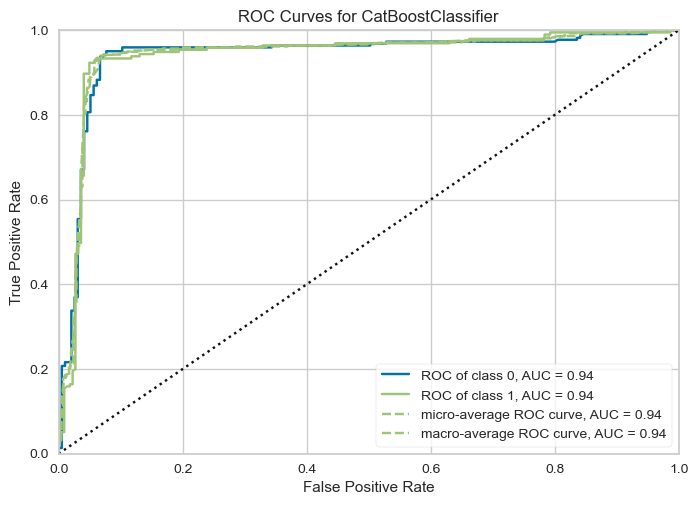

In [21]:
plot_model(tuned, plot = 'auc')

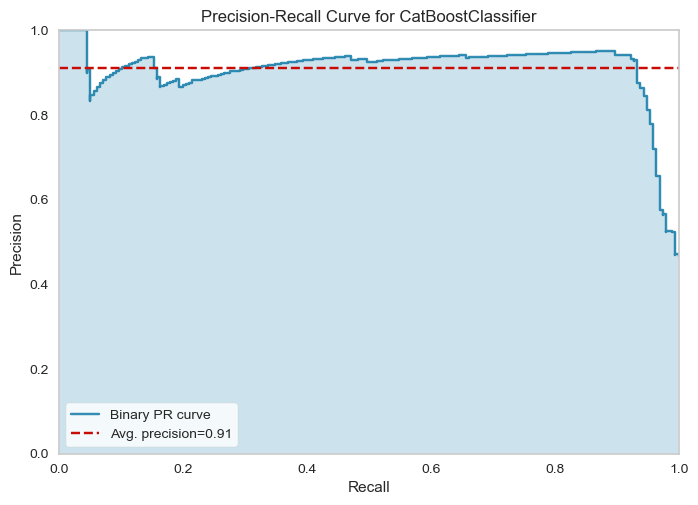

In [22]:
# Precision-Recall Curve

plot_model(tuned, plot = 'pr')


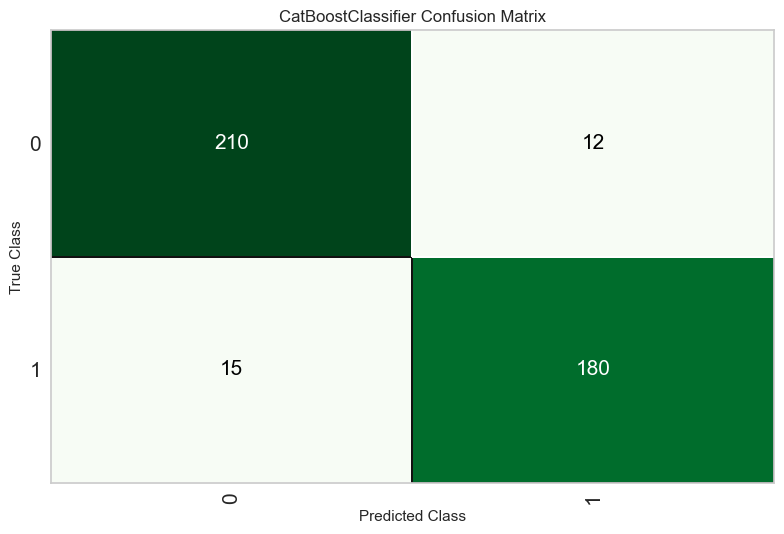

In [23]:
# Confusion Matrix

plot_model(tuned, plot = 'confusion_matrix')


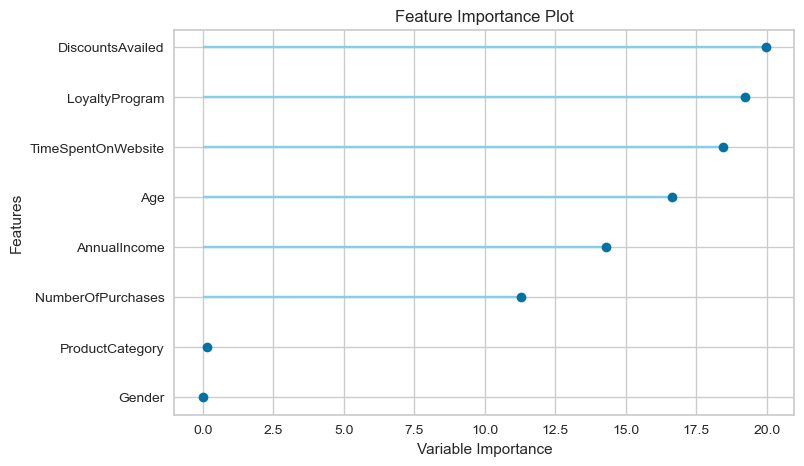

In [24]:
plot_model(tuned,plot='feature')

DiscountsAvailed has the highest importance,indicating it significantly impacts the model’s predictions,followed by LoyaltyProgram,which is the second most important feature.

TimeSpentOnWebsite feature also has a notable impact.

Age,AnnualIncome,NumberOfPurchases features has a moderate importance.

ProductCategory and Gender has the zero importance in model building

#  Predict on test 

In [25]:
predict_model(tuned);

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,CatBoost Classifier,0.9353,0.9405,0.9231,0.9375,0.9302,0.8698,0.8699


In [26]:
# Finalize Model for Deployment
final=finalize_model(tuned)

In [27]:
print(final)

Pipeline(memory=Memory(location=None),
         steps=[('numerical_imputer',
                 TransformerWrapper(exclude=None,
                                    include=['Age', 'Gender', 'AnnualIncome',
                                             'NumberOfPurchases',
                                             'ProductCategory',
                                             'TimeSpentOnWebsite',
                                             'LoyaltyProgram',
                                             'DiscountsAvailed'],
                                    transformer=SimpleImputer(add_indicator=False,
                                                              copy=True,
                                                              fill_value=None,
                                                              keep_empty_features=False,
                                                              missing_values=nan,
                                                              s

In [28]:
predict_model(final);

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,CatBoost Classifier,0.9353,0.9462,0.9179,0.9421,0.9299,0.8698,0.8700


Notice how the AUC in final has increased, even though the model is the same. This is because the final variable has been trained on the complete dataset including the test

## Predict on unseen data

In [29]:
data = df.sample(frac=0.95, random_state=42).reset_index(drop=True)
data_unseen = df.drop(df.index[data.index]).reset_index(drop=True)

print('Data for Modeling: ' + str(data.shape))
print('Unseen Data For Predictions: ' + str(data_unseen.shape))

Data for Modeling: (1319, 9)
Unseen Data For Predictions: (69, 9)


In [30]:
unseen_predictions = predict_model(final, data=data_unseen)
unseen_predictions.head()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,CatBoost Classifier,0.9420,0.9426,0.9459,0.9459,0.9459,0.8834,0.8834


,Age,Gender,AnnualIncome,NumberOfPurchases,ProductCategory,TimeSpentOnWebsite,LoyaltyProgram,DiscountsAvailed,PurchaseStatus,prediction_label,prediction_score
0,64,1,74145.578125,15,1,58.776535,1,5,1,1,0.9885
1,18,1,54909.386719,18,4,32.723328,0,4,1,1,0.9693
2,31,1,82515.718750,1,0,35.886768,1,1,1,1,0.7973
3,36,0,87788.375000,14,1,37.396202,0,1,1,1,0.7265
4,69,1,74931.296875,20,0,17.879305,0,0,0,0,0.9881


The Label and Score columns are added onto the data_unseen set. Label is the prediction and score is the probability of the prediction. Notice that predicted results are concatenated to the original dataset while all the transformations are automatically performed in the background.


In [31]:
# Saving the model

In [32]:
save_model(final,'Final CB Model 29AUG2024')


Transformation Pipeline and Model Successfully Saved


(Pipeline(memory=Memory(location=None),
          steps=[('numerical_imputer',
                  TransformerWrapper(exclude=None,
                                     include=['Age', 'Gender', 'AnnualIncome',
                                              'NumberOfPurchases',
                                              'ProductCategory',
                                              'TimeSpentOnWebsite',
                                              'LoyaltyProgram',
                                              'DiscountsAvailed'],
                                     transformer=SimpleImputer(add_indicator=False,
                                                               copy=True,
                                                               fill_value=None,
                                                               keep_empty_features=False,
                                                               missing_values=nan,
                                                 

In [33]:
saved_final = load_model('Final CB Model 29AUG2024')


Transformation Pipeline and Model Successfully Loaded


# Loading the saved model

To load a saved model at a future date in the same or an alternative environment, we would use PyCaret's load_model() function and then easily apply the saved model on new unseen data for prediction.

In [34]:
new_prediction = predict_model(saved_final, data=data_unseen)

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,CatBoost Classifier,0.9420,0.9426,0.9459,0.9459,0.9459,0.8834,0.8834


In [35]:
new_prediction.head()

,Age,Gender,AnnualIncome,NumberOfPurchases,ProductCategory,TimeSpentOnWebsite,LoyaltyProgram,DiscountsAvailed,PurchaseStatus,prediction_label,prediction_score
0,64,1,74145.578125,15,1,58.776535,1,5,1,1,0.9885
1,18,1,54909.386719,18,4,32.723328,0,4,1,1,0.9693
2,31,1,82515.718750,1,0,35.886768,1,1,1,1,0.7973
3,36,0,87788.375000,14,1,37.396202,0,1,1,1,0.7265
4,69,1,74931.296875,20,0,17.879305,0,0,0,0,0.9881


Notice that the results of unseen_predictions and new_prediction are identical.



# Conclusion

### Catagerical boosting Classifier after tuned with Fitting 10 folds with 70:30 ratio training gives the best accuracy of 94% to predict model that estimates the likelihood of a customer making a purchase.
